In [51]:
import pandas as pd

train_path='agaricus-lepiota-dnjsqhs.csv'

train=pd.read_csv('agaricus-lepiota-dnjsqhs.csv')

train.shape

(8124, 23)

In [53]:
train.head().T

,0,1,2,3,4
class,p,e,e,p,e
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k


In [55]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary=pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary=summary.reset_index()
    summary=summary.rename(columns={'index':'피처'})
    summary['결측값 개수']=df.isnull().sum().values
    summary['고윳값 개수']=df.nunique().values
    summary['첫 번째 값']=df.loc[0].values
    summary['두 번째 값']=df.loc[1].values
    summary['세 번째 값']=df.loc[2].values

    return summary 
    
resumetable(train)

데이터 세트 형상: (8124, 23)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,class,object,0,2,p,e,e
1,cap-shape,object,0,6,x,x,b
2,cap-surface,object,0,4,s,s,s
3,cap-color,object,0,10,n,y,w
4,bruises,object,0,2,t,t,t
5,odor,object,0,9,p,a,l
6,gill-attachment,object,0,2,f,f,f
7,gill-spacing,object,0,2,c,c,c
8,gill-size,object,0,2,n,b,b
9,gill-color,object,0,12,k,k,n


In [57]:
feature = 'cap-shape'
print(f'{feature} 고윳값: {train[feature].unique()}')

cap-shape 고윳값: ['x' 'b' 's' 'f' 'k' 'c']


In [59]:
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [61]:
%matplotlib inline

In [63]:
mpl.rc('font', size = 15) # 폰트 크기 설정
plt.figure(figsize = (7,6))  # Figure 크기 설정

# 타깃값 분포 카운트플롯
ax = sns.countplot(x = 'class', data = train)
ax.set_title('Target Distribution')

Text(0.5, 1.0, 'Target Distribution')

In [65]:
rectangle = ax.patches[0]  # 첫 번째 Rectangle 객체
print('사각형 높이: ', rectangle.get_height())
print('사각형 너비: ', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치: ', rectangle.get_x())

사각형 높이:  3916.0
사각형 너비:  0.8
사각형 왼쪽 테두리의 x축 위치:  -0.4


In [67]:
print('텍스트 위치의 x좌표:', rectangle.get_x() + rectangle.get_width()/2.0)
print('텍스트 위치의 y좌표:', rectangle.get_height() + len(train)*0.001)

텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 3924.124


<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

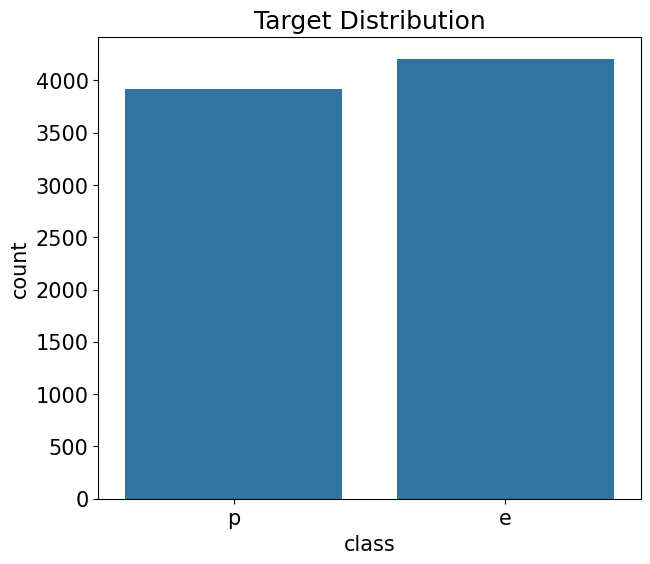

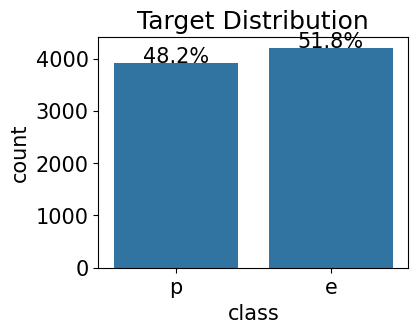

In [69]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()   
        width = patch.get_width()    
        left_coord = patch.get_x()      
        percent = height/total_size*100 # 타깃값 비율
        
        ax.text(x=left_coord + width/2.0,  
                y=height + total_size*0.001, 
                s=f'{percent:1.1f}%',       
                ha='center')                 

plt.figure(figsize=(4, 3))

ax = sns.countplot(x='class', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution');

plt.show()

In [71]:
# 교차분석표 함수로 만들기
def get_crosstab(df, feature):
  crosstab = pd.crosstab(df[feature], df['class'], normalize = 'index') * 100
  crosstab = crosstab.reset_index()
  return crosstab

In [73]:
crosstab = get_crosstab(train, 'cap-shape')
crosstab

class,cap-shape,e,p
0,b,89.380531,10.619469
1,c,0.000000,100.000000
2,f,50.634518,49.365482
3,k,27.536232,72.463768
4,s,100.000000,0.000000
5,x,53.282276,46.717724


In [75]:
crosstab = get_crosstab(train, 'cap-surface')
crosstab

class,cap-surface,e,p
0,f,67.241379,32.758621
1,g,0.000000,100.000000
2,s,44.757433,55.242567
3,y,46.362515,53.637485


In [77]:
crosstab = get_crosstab(train, 'cap-color')
crosstab

class,cap-color,e,p
0,b,28.571429,71.428571
1,c,72.727273,27.272727
2,e,41.600000,58.400000
3,g,56.086957,43.913043
4,n,55.341506,44.658494
5,p,38.888889,61.111111
6,r,100.000000,0.000000
7,u,100.000000,0.000000
8,w,69.230769,30.769231
9,y,37.313433,62.686567


In [79]:
crosstab = get_crosstab(train, 'bruises')
crosstab

class,bruises,e,p
0,f,30.665543,69.334457
1,t,81.516588,18.483412


In [81]:
crosstab = get_crosstab(train, 'odor')
crosstab

class,odor,e,p
0,a,100.000000,0.000000
1,c,0.000000,100.000000
2,f,0.000000,100.000000
3,l,100.000000,0.000000
4,m,0.000000,100.000000
5,n,96.598639,3.401361
6,p,0.000000,100.000000
7,s,0.000000,100.000000
8,y,0.000000,100.000000


In [83]:
crosstab = get_crosstab(train, 'gill-spacing')
crosstab

class,gill-spacing,e,p
0,c,44.157369,55.842631
1,w,91.463415,8.536585


In [85]:
crosstab = get_crosstab(train, 'gill-size')
crosstab

class,gill-size,e,p
0,b,69.850321,30.149679
1,n,11.464968,88.535032


In [87]:
crosstab = get_crosstab(train, 'gill-color')
crosstab

class,gill-color,e,p
0,b,0.000000,100.000000
1,e,100.000000,0.000000
2,g,32.978723,67.021277
3,h,27.868852,72.131148
4,k,84.313725,15.686275
5,n,89.312977,10.687023
6,o,100.000000,0.000000
7,p,57.104558,42.895442
8,r,0.000000,100.000000
9,u,90.243902,9.756098


In [89]:
crosstab = get_crosstab(train, 'stalk-shape')
crosstab

class,stalk-shape,e,p
0,e,45.96132,54.03868
1,t,56.25000,43.75000


In [91]:
crosstab = get_crosstab(train, 'stalk-root')
crosstab

class,stalk-root,e,p
0,?,29.032258,70.967742
1,b,50.847458,49.152542
2,c,92.086331,7.913669
3,e,77.142857,22.857143
4,r,100.000000,0.000000


In [93]:
crosstab = get_crosstab(train, 'stalk-surface-above-ring')
crosstab

class,stalk-surface-above-ring,e,p
0,f,73.913043,26.086957
1,k,6.070826,93.929174
2,s,70.324575,29.675425
3,y,66.666667,33.333333


In [95]:
crosstab = get_crosstab(train, 'stalk-surface-below-ring')
crosstab

class,stalk-surface-below-ring,e,p
0,f,76.000000,24.000000
1,k,6.250000,93.750000
2,s,68.881686,31.118314
3,y,73.239437,26.760563


In [97]:
crosstab = get_crosstab(train, 'stalk-color-above-ring')
crosstab

class,stalk-color-above-ring,e,p
0,b,0.000000,100.000000
1,c,0.000000,100.000000
2,e,100.000000,0.000000
3,g,100.000000,0.000000
4,n,3.571429,96.428571
5,o,100.000000,0.000000
6,p,30.769231,69.230769
7,w,61.648746,38.351254
8,y,0.000000,100.000000


In [99]:
crosstab = get_crosstab(train, 'stalk-color-below-ring')
crosstab

class,stalk-color-below-ring,e,p
0,b,0.000000,100.000000
1,c,0.000000,100.000000
2,e,100.000000,0.000000
3,g,100.000000,0.000000
4,n,12.500000,87.500000
5,o,100.000000,0.000000
6,p,30.769231,69.230769
7,w,61.678832,38.321168
8,y,0.000000,100.000000


In [101]:
crosstab = get_crosstab(train, 'ring-number')
crosstab

class,ring-number,e,p
0,n,0.000000,100.000000
1,o,49.145299,50.854701
2,t,88.000000,12.000000


In [103]:
crosstab = get_crosstab(train, 'ring-type')
crosstab

class,ring-type,e,p
0,e,36.311239,63.688761
1,f,100.000000,0.000000
2,l,0.000000,100.000000
3,n,0.000000,100.000000
4,p,79.435484,20.564516


In [105]:
crosstab = get_crosstab(train, 'spore-print-color')
crosstab

class,spore-print-color,e,p
0,b,100.000000,0.000000
1,h,2.941176,97.058824
2,k,88.034188,11.965812
3,n,88.617886,11.382114
4,o,100.000000,0.000000
5,r,0.000000,100.000000
6,u,100.000000,0.000000
7,w,24.120603,75.879397
8,y,100.000000,0.000000


In [107]:
crosstab = get_crosstab(train, 'population')
crosstab

class,population,e,p
0,a,100.000000,0.000000
1,c,84.705882,15.294118
2,n,100.000000,0.000000
3,s,70.512821,29.487179
4,v,29.504950,70.495050
5,y,62.149533,37.850467


In [109]:
crosstab = get_crosstab(train, 'habitat')
crosstab

class,habitat,e,p
0,d,59.720457,40.279543
1,g,65.549348,34.450652
2,l,28.846154,71.153846
3,m,87.671233,12.328767
4,p,11.888112,88.111888
5,u,26.086957,73.913043
6,w,100.000000,0.000000


In [111]:
def plot_pointplot(ax, feature, crosstab):
    """포인트플롯을 그리는 함수"""
    
    target_column = crosstab.columns[1] if len(crosstab.columns) > 1 else crosstab.columns[0]

    ax2=ax.twinx()
   
    ax2 = sns.pointplot(x=feature, y=target_column, data=crosstab,
                        order=crosstab[feature].values,
                        color='black', legend=False)
    
    # y축의 범위는 target_column에 기반하여 설정
    ax2.set_ylim(crosstab[target_column].min() - 5, crosstab[target_column].max() * 1.1)
    ax2.set_ylabel(f'Target {target_column} Ratio(%)')

In [113]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15, 25)):
    """명목형 피처와 타깃 값의 분포를 시각화하는 함수"""
    fig, axes = plt.subplots(num_rows, num_cols, figsize=size)
    axes = axes.ravel()

    for idx, feature in enumerate(features):
        ax = axes[idx]
        crosstab = get_crosstab(df, feature)
        
        # Countplot 그리기
        sns.countplot(x=feature, data=df, order=crosstab[feature].values, color='skyblue', ax=ax)
        
        write_percent(ax, len(df))
        
        # 포인트플롯 
        plot_pointplot(ax, feature, crosstab)
        
        ax.set_title(f'{feature} Distribution')

    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.8, wspace=0.4)
    plt.show()

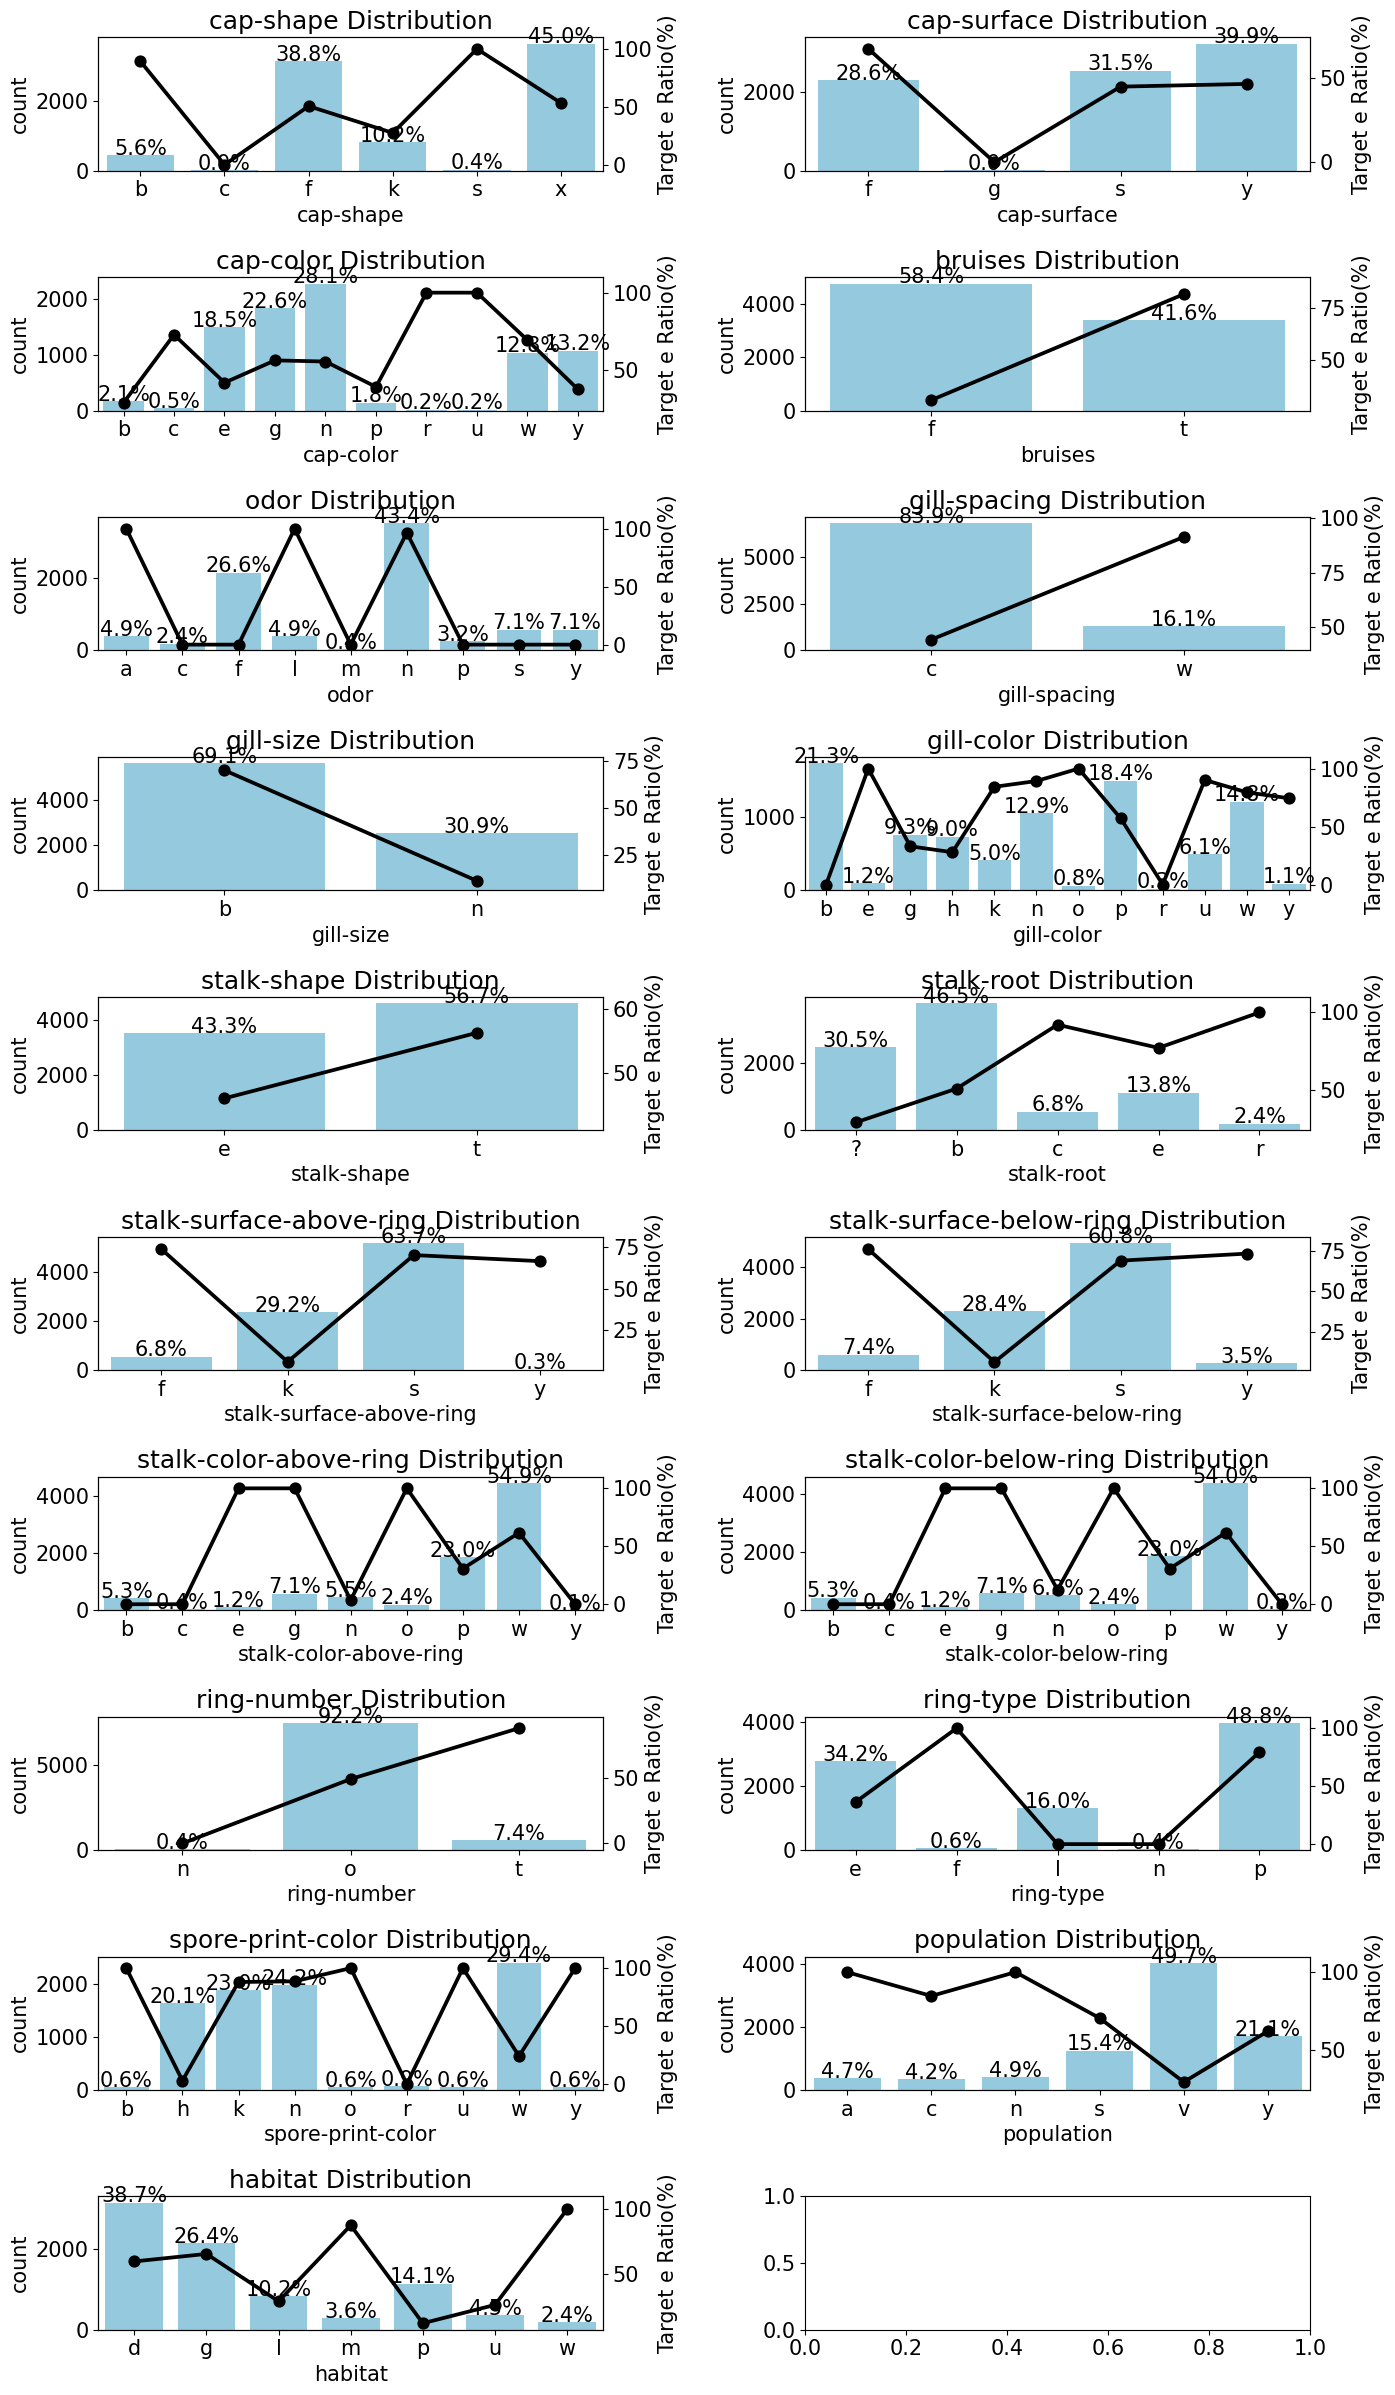

In [115]:
features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises','odor','gill-spacing','gill-size',
            'gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',
            'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','ring-number',
            'ring-type','spore-print-color','population','habitat'] # 명목형 피처
plot_cat_dist_with_true_ratio(train, features, num_rows=10, num_cols=2)

In [116]:
train=pd.read_csv('agaricus-lepiota-with-names-filtered.csv')

groupings={
    'cap-shape':{
        'b': 'b_s','s':'b_s',
        'c':'c_k','k':'c_k',
        'f':'f_x','x':'f_x'},
    'cap-surface':{
        'f':'f',
        'g':'g',
        's':'s_y','y':'s_y'},
    'cap-color':{
        'b':'b',
        'c':'c_r_u_w','r':'c_r_u_w','u':'c_r_u_w','w':'c_r_u_w',
        'e':'e_p_y','p':'e_p_y','y':'e_p_y',
        'g':'g_n','n':'g_n'},
    'bruises':{
        'f':'f',
        't':'t'},
    'odor':{
        'a':'a_l_n','l':'a_l_n','n':'a_l_n',
        'c':'c_f_m_p_s_y','f':'c_f_m_p_s_y','m':'c_f_m_p_s_y',
        'p':'c_f_m_p_s_y','s':'c_f_m_p_s_y','y':'c_f_m_p_s_y'},
    'gill-spacing':{
        'c':'c',
        'w':'w'},
    'gill-size':{
        'b':'b',
        'n':'n'},
    'gill-color':{
        'b':'b_r','r':'b_r',
        'e':'e_k_n_o_u_w_y','k':'e_k_n_o_u_w_y','n':'e_k_n_o_u_w_y',
        'o':'e_k_n_o_u_w_y','u':'e_k_n_o_u_w_y','w':'e_k_n_o_u_w_y','y':'e_k_n_o_u_w_y',
        'g':'g_h','h':'g_h',
        'p':'p'},
    'stalk-shape':{
        'e':'e',
        't':'t'},
    'stalk-root':{
        '?':'?',
        'b':'b',
        'c':'c_r','r':'c_r',
        'e':'e'},
    'stalk-surface-above-ring':{
        'k':'k',
        'f':'f_s_y','s':'f_s_y','y':'f_s_y'},
    'stalk-surface-below-ring':{
        'k':'k',
        'f':'f',
        's':'s',
        'y':'y'},
    'stalk-color-above-ring':{
        'p':'p',
        'b':'b_c_n_y','c':'b_c_n_y','n':'b_c_n_y','y':'b_c_n_y',
        'e':'e_g_o','g':'e_g_o','o':'e_g_o',
        'w':'w'},
    'stalk-color-below-ring':{
        'w':'w',
        'b':'b_c_y','c':'b_c_y','y':'b_c_y',
        'n':'n_p','p':'n_p',
        'e':'e_g_o','g':'e_g_o','o':'e_g_o'},
    'ring-number':{
        'n':'n',
        'o':'o',
        't':'t'},
    'ring-type':{
        'e':'e',
        'f':'f_p','p':'f_p',
        'l':'l','n':'n'},
    'spore-print-color':{
        'w':'w',
        'b':'b_o_u_y','o':'b_o_u_y','u':'b_o_u_y','y':'b_o_u_y',
        'h':'h_r','r':'h_r',
        'k':'k_n','n':'k_n'},
    'population':{
        'v':'v',
        'a':'a_n','n':'a_n',
        'c':'c',
        's':'s_y','y':'s_y'},
    'habitat':{
        'p':'p',
        'd':'d_g','g':'d_g',
        'l':'l_u','u':'l_u',
        'm':'m_w','w':'m_w'}
}

for feature, mapping in groupings.items():
    if feature in train.columns:
        train[feature]=train[feature].map(mapping)

print(train.head())
        
        

  cap-shape cap-surface cap-color bruises         odor gill-spacing gill-size  \
0       f_x         s_y       g_n       t  c_f_m_p_s_y            c         n   
1       f_x         s_y     e_p_y       t        a_l_n            c         b   
2       b_s         s_y   c_r_u_w       t        a_l_n            c         b   
3       f_x         s_y   c_r_u_w       t  c_f_m_p_s_y            c         n   
4       f_x         s_y       g_n       f        a_l_n            w         b   

      gill-color stalk-shape stalk-root stalk-surface-above-ring  \
0  e_k_n_o_u_w_y           e          e                    f_s_y   
1  e_k_n_o_u_w_y           e        c_r                    f_s_y   
2  e_k_n_o_u_w_y           e        c_r                    f_s_y   
3  e_k_n_o_u_w_y           e          e                    f_s_y   
4  e_k_n_o_u_w_y           t          e                    f_s_y   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                        s  

In [117]:
indexed_groupings = {
    "cap-shape": {
        "b_s": 0,
        "c_k": 1,
        "f_x": 2
    },
    "cap-surface": {
        "f": 3,
        "g": 4,
        "s_y": 5
    },
    "cap-color": {
        "b": 6,
        "c_r_u_w": 7,
        "e_p_y": 8,
        "g_n": 9
    },
    "bruises": {
        "f": 10,
        "t": 11
    },
    "odor": {
        "a_l_n": 12,
        "c_f_m_p_s_y": 13
    },
    "gill-spacing": {
        "c": 14,
        "w": 15
    },
    "gill-size": {
        "b": 16,
        "n": 17
    },
    "gill-color": {
        "b_r": 18,
        "e_k_n_o_u_w_y": 19,
        "g_h": 20,
        "p": 21
    },
    "stalk-shape": {
        "e": 22,
        "t": 23
    },
    "stalk-root": {
        "?": 24,
        "b": 25,
        "c_r": 26,
        "e": 27
    },
    "stalk-surface-above-ring": {
        "k": 28,
        "f_s_y": 29
    },
    "stalk-surface-below-ring": {
        "k": 30,
        "f": 31,
        "s": 32,
        "y": 33
    },
    "stalk-color-above-ring": {
        "p": 34,
        "b_c_n_y": 35,
        "e_g_o": 36,
        "w": 37
    },
    "stalk-color-below-ring": {
        "w": 38,
        "b_c_y": 39,
        "n_p": 40,
        "e_g_o": 41
    },
    "ring-number": {
        "n": 42,
        "o": 43,
        "t": 44
    },
    "ring-type": {
        "e": 45,
        "f_p": 46,
        "l": 47,
        "n": 48
    },
    "spore-print-color": {
        "w": 49,
        "b_o_u_y": 50,
        "h_r": 51,
        "k_n": 52
    },
    "population": {
        "v": 53,
        "a_n": 54,
        "c": 55,
        "s_y": 56
    },
    "habitat": {
        "p": 57,
        "d_g": 58,
        "l_u": 59,
        "m_w": 60
    }
}


In [118]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

# 문자열 데이터를 숫자로 변환
train_encoded = train.copy()  # 원본 데이터 유지
label_encoders = {}  # 각 열에 대해 LabelEncoder 저장

for col in train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_encoded[col] = le.fit_transform(train[col])
    label_encoders[col] = le

# 숫자형 데이터만 선택
train_numeric = train_encoded.select_dtypes(include=[np.number])

# p-value 계산 함수
def calculate_p_values(train):
    cols = train.columns
    p_values = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i == j:
                p_values.iloc[i, j] = np.nan  # 동일 변수 간의 상관은 제외
            else:
                _, p_value = pearsonr(train[cols[i]], train[cols[j]])
                p_values.iloc[i, j] = p_value
    return p_values

# p-value 표 작성
p_value_table = calculate_p_values(train_numeric)

# 결과 출력
print("P-value Table:")
print(p_value_table)


P-value Table:
                              cap-shape    cap-surface     cap-color  \
cap-shape                           NaN   1.142926e-38  1.147120e-28   
cap-surface                1.142926e-38            NaN  8.364026e-27   
cap-color                  1.147120e-28   8.364026e-27           NaN   
bruises                    1.246898e-04   1.113198e-02  4.434749e-43   
odor                       1.403436e-25   2.571238e-64  4.342619e-02   
gill-spacing               1.018355e-01   8.325144e-77  6.202845e-19   
gill-size                  5.492395e-10  8.690761e-123  1.625191e-01   
gill-color                 2.624941e-48  1.937410e-173  1.231375e-05   
stalk-shape                1.355901e-77   2.965505e-01  1.740380e-49   
stalk-root                 2.562920e-31   1.645936e-62  3.146017e-18   
stalk-surface-above-ring   9.301405e-03   1.713492e-03  9.307655e-23   
stalk-surface-below-ring   1.154187e-22   3.071445e-12  3.728482e-03   
stalk-color-above-ring     1.004728e-41   3.07449